In [ ]:
#pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

In [ ]:
# Import libraries
import pycaret
import pandas as pd
from pycaret.regression import *

In [ ]:
data = pd.read_csv('/content/winequality-red.csv', sep=';') # load data form the csv file and save it in data
display(data.head()) # display the first five rows of the file

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
s = setup( # initiate the setup funcion and save it as s
    data, # load the wineset data
    target='alcohol',  # set the target variable to alcohol and save it in target
    session_id=123,  # set the random seed to 123 and save it in session_id

)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:

get_config() # display all the configuration variables created during setup


{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:

get_config('X_train_transformed').head() # display the first 5 rows of the training data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,6.0
800,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,5.0
1441,7.4,0.785,0.19,5.2,0.094,19.0,98.0,0.99713,3.16,0.52,6.0
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,8.0
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,5.0


In [ ]:
print("Current seed:", get_config('seed')) # print the current seed
set_config('seed', 786) # change the seed to 786
print("New seed:", get_config('seed')) # print the new seed


Current seed: 123
New seed: 786


In [ ]:
best = compare_models() # compare all the models and save the best model in best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.1110
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.0970
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.3090
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.6020
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.2470
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0360
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0190
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.1390
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0350
br,Bayesian Ridge,0.6658,0.7470,0.8613,0.3200,0.0733,0.0630,0.0200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
comparisonResults = pull() # get the results of the comparison and save them in comparisonResults
comparisonResults.head() # display the first five rows of the results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.111
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.097
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.309
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.602
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.247


In [ ]:
best = create_model('lightgbm') # create a LightGBM model and save it in best

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3274,0.1962,0.4430,0.7728,0.0397,0.0324
1,0.4045,0.3598,0.5999,0.6505,0.0514,0.0384
2,0.3589,0.2715,0.5210,0.7726,0.0447,0.0342
3,0.3786,0.2829,0.5319,0.7848,0.0456,0.0361
4,0.2813,0.1942,0.4407,0.7816,0.0373,0.0266
5,0.3400,0.2531,0.5031,0.7886,0.0417,0.0314
6,0.3364,0.3284,0.5731,0.7029,0.0462,0.0310
7,0.3529,0.2465,0.4964,0.8012,0.0431,0.0339
8,0.3553,0.2869,0.5357,0.6843,0.0460,0.0339


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
createResults = pull() # get the results from the model creation and save them in createResults
createResults.head() # display the first five rows of the results

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3274,0.1962,0.4430,0.7728,0.0397,0.0324
1,0.4045,0.3598,0.5999,0.6505,0.0514,0.0384
2,0.3589,0.2715,0.5210,0.7726,0.0447,0.0342
3,0.3786,0.2829,0.5319,0.7848,0.0456,0.0361
4,0.2813,0.1942,0.4407,0.7816,0.0373,0.0266


In [ ]:
tunedBest = tune_model(best) # tune the model and save it in tunedBest
tunedBest # display the tuned model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3909,0.2711,0.5207,0.6861,0.0465,0.0385
1,0.4709,0.4004,0.6327,0.6111,0.0546,0.0447
2,0.4034,0.2769,0.5262,0.7681,0.0457,0.0389
3,0.5092,0.4093,0.6398,0.6887,0.0553,0.0487
4,0.4031,0.3208,0.5664,0.6393,0.0481,0.0381
5,0.4500,0.3827,0.6186,0.6803,0.0512,0.0416
6,0.4032,0.4133,0.6429,0.6261,0.0527,0.0374
7,0.4623,0.3631,0.6025,0.7072,0.0518,0.0443
8,0.4210,0.2907,0.5392,0.6801,0.0472,0.0409


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LGBMRegressor(n_jobs=-1, random_state=123)

In [ ]:
tuneResults = pull() # get the results of the tunning and save them in tuneResults
tuneResults # display the results of the tunning


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3909,0.2711,0.5207,0.6861,0.0465,0.0385
1,0.4709,0.4004,0.6327,0.6111,0.0546,0.0447
2,0.4034,0.2769,0.5262,0.7681,0.0457,0.0389
3,0.5092,0.4093,0.6398,0.6887,0.0553,0.0487
4,0.4031,0.3208,0.5664,0.6393,0.0481,0.0381
5,0.4500,0.3827,0.6186,0.6803,0.0512,0.0416
6,0.4032,0.4133,0.6429,0.6261,0.0527,0.0374
7,0.4623,0.3631,0.6025,0.7072,0.0518,0.0443
8,0.4210,0.2907,0.5392,0.6801,0.0472,0.0409


In [ ]:
baggedBest = ensemble_model(best, method='Bagging') # create an bagging ensemble model using the best model and save it in baggedBest
baggedBest # dispaly the resutls of the bagged model


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3321,0.1866,0.4320,0.7839,0.0386,0.0327
1,0.4112,0.3458,0.5881,0.6641,0.0505,0.0390
2,0.3442,0.2373,0.4871,0.8012,0.0421,0.0330
3,0.3762,0.2660,0.5157,0.7977,0.0441,0.0359
4,0.2902,0.2199,0.4690,0.7527,0.0396,0.0274
5,0.3437,0.2570,0.5070,0.7853,0.0417,0.0316
6,0.3337,0.3224,0.5678,0.7083,0.0457,0.0308
7,0.3687,0.2494,0.4994,0.7988,0.0433,0.0352
8,0.3529,0.2651,0.5149,0.7083,0.0443,0.0338


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=LGBMRegressor(n_jobs=-1, random_state=123),
                 random_state=123)

In [ ]:
boostedBest = ensemble_model(best, method='Boosting') # create a boosting ensemble model using the best model and save it in boostedBest
boostedBest


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2922,0.1693,0.4115,0.8039,0.0369,0.0289
1,0.4147,0.3743,0.6118,0.6364,0.0529,0.0397
2,0.3430,0.2248,0.4741,0.8117,0.0410,0.0329
3,0.3816,0.2986,0.5465,0.7729,0.0469,0.0366
4,0.2876,0.1717,0.4144,0.8069,0.0357,0.0274
5,0.3393,0.2396,0.4895,0.7998,0.0403,0.0313
6,0.3071,0.2952,0.5433,0.7330,0.0434,0.0283
7,0.3450,0.2518,0.5018,0.7969,0.0438,0.0333
8,0.3390,0.2496,0.4996,0.7253,0.0432,0.0324


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=LGBMRegressor(n_jobs=-1, random_state=123),
                  n_estimators=10, random_state=123)

In [ ]:
topThree = compare_models(sort='MAE', n_select=3) #compare the models sort them by MAE and save the results in topThree
blendedModels = blend_models(topThree) # blend the top three models toggether to create an ensamble model ans save it in blendedModels
blendedModels # display the results of the blended models


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1460
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.2300
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.1260
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.4590
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.1570
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0200
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0170
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0210
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.1730
br,Bayesian Ridge,0.6658,0.7470,0.8613,0.3200,0.0733,0.0630,0.0200


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3011,0.1827,0.4275,0.7884,0.0381,0.0297
1,0.3776,0.3112,0.5579,0.6977,0.0480,0.0358
2,0.3348,0.2348,0.4846,0.8033,0.0419,0.0321
3,0.3320,0.2505,0.5005,0.8095,0.0428,0.0317
4,0.2713,0.1951,0.4417,0.7807,0.0376,0.0258
5,0.3267,0.2493,0.4993,0.7918,0.0410,0.0299
6,0.3060,0.3067,0.5538,0.7225,0.0444,0.0282
7,0.3493,0.2437,0.4936,0.8035,0.0426,0.0333
8,0.3329,0.2676,0.5173,0.7055,0.0445,0.0317


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=N...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None, ...)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

In [ ]:
stackedModels = stack_models(topThree) # stack the top three models together to create a stacked ensemble model and save it in stacked
stackedModels # display the results of the stacked models


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3011,0.1796,0.4238,0.7920,0.0378,0.0296
1,0.3834,0.3266,0.5715,0.6827,0.0491,0.0364
2,0.3368,0.2392,0.4891,0.7996,0.0421,0.0323
3,0.3399,0.2499,0.4999,0.8099,0.0429,0.0325
4,0.2746,0.1954,0.4421,0.7803,0.0374,0.0259
5,0.3238,0.2400,0.4899,0.7995,0.0403,0.0298
6,0.3081,0.3036,0.5510,0.7254,0.0442,0.0283
7,0.3445,0.2355,0.4853,0.8100,0.0421,0.0330
8,0.3359,0.2699,0.5195,0.7030,0.0447,0.0319


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

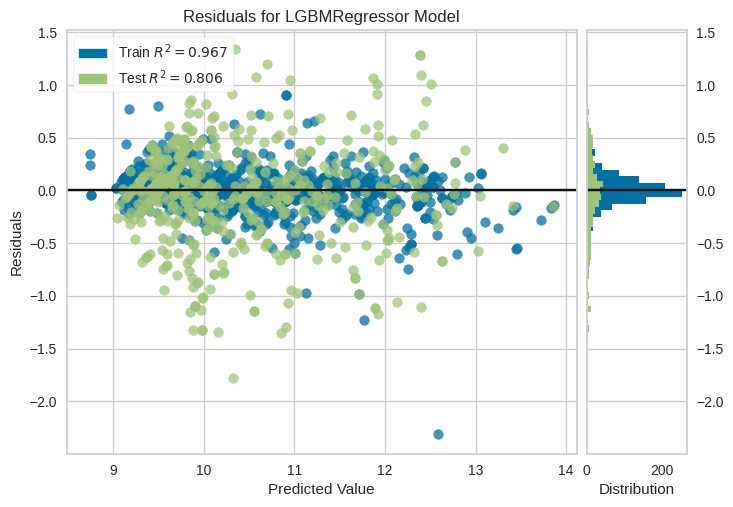

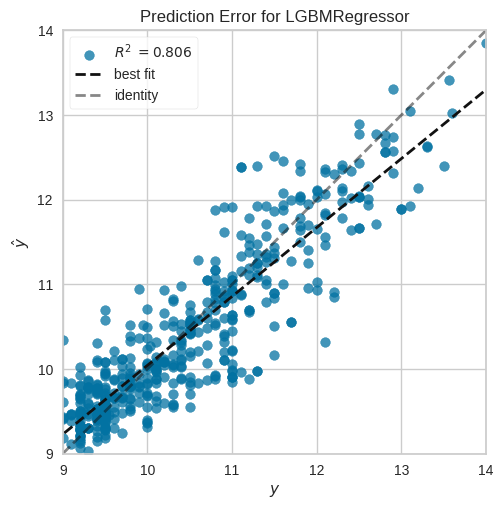

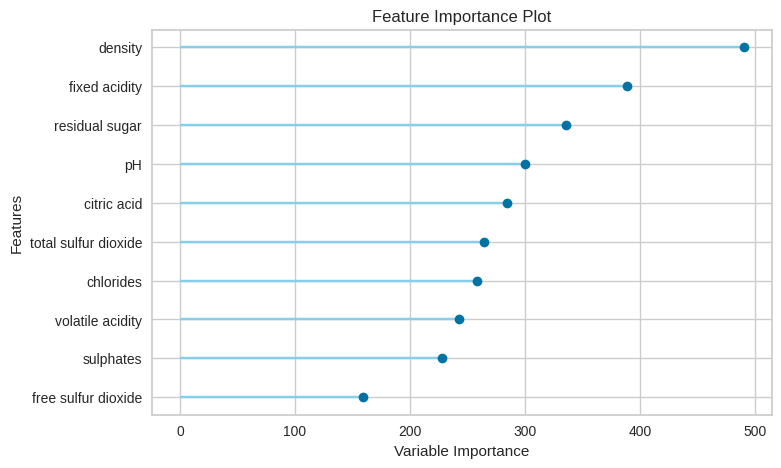

In [ ]:

plot_model(best, plot='residuals') # Plot residuals of best model

plot_model(best, plot='error') # Plot prediction error of best model

plot_model(best, plot='feature') # Plot feature importance of best model

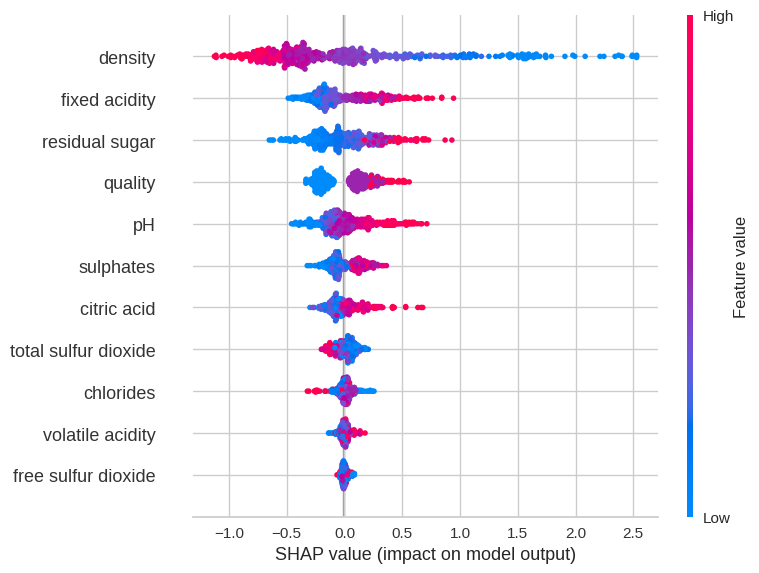

In [ ]:
interpret_model(best, plot='summary') # plot a summary that will show which features affect the model the most


In [ ]:
interpret_model(best, plot='reason', observation=1) # plot a reason that will show why the model made its prediction


In [ ]:
evaluate_model(best) # display the model evaluation screen

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
holdoutPredict = predict_model(best) # make predictions based on the models holdout and save them in holdoutPredict
holdoutPredict.head() # display the first five rows of the holdout prediction

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3519,0.2284,0.4779,0.8063,0.0408,0.0331


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,6,12.2,10.848043
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,5,9.4,9.473790
1037,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,5,9.2,9.701460
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,6,12.3,12.133142
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,5,9.3,9.870518


In [ ]:
copiedData = data.copy() # make a copy of the data and save it in copiedData
copiedData.drop('alcohol', axis=1, inplace=True) # drop the alcohol colum in the copied data
copiedData.head() # display the first five rows of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5


In [ ]:
predicts = predict_model(best, data=copiedData) # make predictions based on the copied data and save them in predicts
predicts.head()  # display the first five rows of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.380450
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,9.702191
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,9.733987
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,9.959491
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,9.380450


In [ ]:
leaderBoard = get_leaderboard() # get the leaderbord of all the models trained and save it in leaderBoard
leaderBoard # display the leaderboad


Processing:   0%|          | 0/46 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4532,0.3609,0.5971,0.6691,0.0517,0.0434
1,Lasso Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.8276,1.0688,1.0309,0.0308,0.0875,0.0782
2,Ridge Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.6673,0.7503,0.8632,0.3169,0.0734,0.0632
3,Elastic Net,"(TransformerWrapper(include=['fixed acidity', ...",0.8211,1.0630,1.0280,0.0361,0.0873,0.0776
4,Least Angle Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4532,0.3609,0.5971,0.6691,0.0517,0.0434
5,Lasso Least Angle Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.8276,1.0688,1.0309,0.0308,0.0875,0.0782
6,Orthogonal Matching Pursuit,"(TransformerWrapper(include=['fixed acidity', ...",0.8234,1.0683,1.0306,0.0311,0.0875,0.0778
7,Bayesian Ridge,"(TransformerWrapper(include=['fixed acidity', ...",0.6658,0.7470,0.8613,0.3200,0.0733,0.0630
8,Passive Aggressive Regressor,"(TransformerWrapper(include=['fixed acidity', ...",1.1534,2.2856,1.4286,-1.0358,0.1273,0.1123


In [ ]:
bestAutomodel = automl() # get the best models based on CV and save it in Automodel
bestAutomodel # display the best models


StackingRegressor(cv=5,
                  estimators=[('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [ ]:
# dashboard(best, display_format='inline')  # create a dashboard


In [ ]:
create_app(best) # create a gradio app


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://41ad117ac17903a8fb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
 create_api(best, api_name='wine_api') # create an api


API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python wine_api.py


In [ ]:
!python wine_api.py # run the wine_api.py file as a Python script

Transformation Pipeline and Model Successfully Loaded
Traceback (most recent call last):
  File "/content/wine_api.py", line 16, in <module>
    input_model = create_model("wine_api_input", **{'fixed acidity': 14.0, 'volatile acidity': 0.4099999964237213, 'citric acid': 0.6299999952316284, 'residual sugar': 3.799999952316284, 'chlorides': 0.08900000154972076, 'free sulfur dioxide': 6.0, 'total sulfur dioxide': 47.0, 'density': 1.0013999938964844, 'pH': 3.009999990463257, 'sulphates': 0.8100000023841858, 'quality': 6.0})
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pydantic/main.py", line 1763, in create_m

In [ ]:
create_docker('wine_api') # create the docker File

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# %load DockerFile # load the docker file

In [ ]:
# %load requirements.txt # load the requrements file

In [ ]:
finalBest = finalize_model(best) # train the best model on the full dataset and save it in finalBest
finalBest # Display the final model


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 LGBMRegressor(n_jobs=-1, random_state=123))])

In [ ]:
#print(convert_model(best, language='java')) # convert the best model to java code


In [ ]:
save_model(best, 'wine_quality_regression_pipeline') #save the beset model as wine_quality_regression_pipeline

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))]),
 'wine_quality_regression_pipe

In [ ]:
loaded_best_pipeline = load_model('wine_quality_regression_pipeline') # load the saved best model back into the notebook
loaded_best_pipeline # display the saved model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))])